In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Explore the data

In [7]:
df=pd.read_csv("../Data/train.csv")
print(df.head())



    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [16]:
print(df.shape)
print("Null Values \n"+ str(df.isnull().sum()))
print("Data Types \n"+ str(df.dtypes))

(614, 13)
Null Values 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Data Types 
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [17]:
#uniques values in each column

print(df.nunique())

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

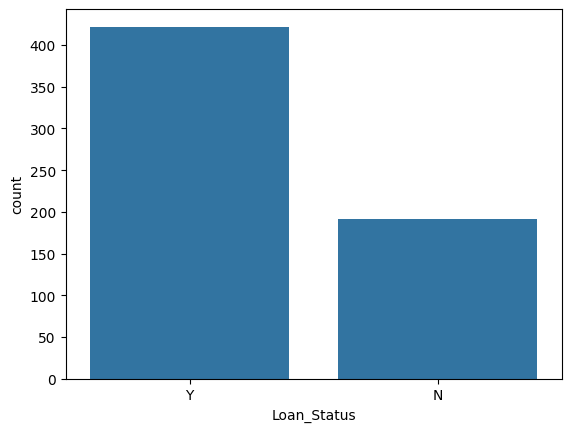

In [20]:
#count plot for target variable i.e Loan_status

sns.countplot(x="Loan_Status", data=df)

# Data cleaning 
We usually fill catagorical data with the mode of data if null values are relatively low.

In [23]:
#Gender Married Dependents Self_Employed Loan_Amount_Term  fill these columns with mode of each column

for col in ["Gender", "Married","Dependents","Self_Employed","Loan_Amount_Term"]:
    df[col]=df[col].fillna(df[col].mode()[0])

Fill Numerical columns with mean

In [26]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mean())

# Data preprocessing

model needs the numerical input so we need to encode the catagorical data into numerical

In [29]:
# Gender Married Education Self_Employed Property_Area Loan_Status 
catagorical_columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le=LabelEncoder()
for col in catagorical_columns:
    df[col]=le.fit_transform(df[col])

Since data has been encooded we need to split data into x and y

In [ ]:
x=df.drop(columns=["Loan_ID","Loan_Status"]) #Gives us the features to train the model 

In [33]:
y=df["Loan_Status"] #Target column

In [35]:
#Split the data to train and test set now

x_train, x_test, y_train , y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [50]:
print(x_train)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
83        1        1           0          0              0             6000   
90        1        1           0          0              0             2958   
227       1        1           2          0              0             6250   
482       1        1           0          0              0             2083   
464       1        0           0          0              0             4166   
..      ...      ...         ...        ...            ...              ...   
71        1        1           2          1              1             1875   
106       1        1           2          0              0            11417   
270       0        0           0          0              0             3237   
435       0        1           0          0              0            10047   
102       1        1           0          0              0            13650   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

Scale the data so that it can be consistent

In [40]:
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Train the logistic regression model now.

In [43]:
model=LogisticRegression()
model.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
y_pred=model.predict(x_test_scaled)

In [45]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1]


In [49]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

[[18 25]
 [ 1 79]]


In [51]:
df['Loan_Status'].value_counts(normalize=True)


Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64